## 3. (1) Solution of Ridge Regression and Lasso

### Ridge Regression Objective:
The Ridge regression problem is given by:

$$
\min_{\mathbf{w}, w_0} \left( \frac{1}{2} \|\mathbf{X}\mathbf{w} + w_0 - \mathbf{y}\|^2 + \lambda \|\mathbf{w}\|^2_2 \right)
$$

### Lasso Regression Objective:

The Lasso regression problem is given by:

$$
\min_{\mathbf{w}, w_0} \left( \frac{1}{2} \|\mathbf{X}\mathbf{w} + w_0 - \mathbf{y}\|^2 + \lambda \|\mathbf{w}\|_1 \right)
$$

In [1]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the E2006-tfidf dataset which is downloaded from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html
X_train, y_train, X_test, y_test = load_svmlight_files(('E2006.train', 'E2006.test'))  # Adjust path as needed

num_samples = X_train.shape[0] #should be 16087
print(num_samples)

16087


In [3]:
lamda = 0.1
# Ridge Regression

ridge = Ridge(alpha=lamda)
ridge.fit(X_train, y_train)
ridge_w = ridge.coef_

# Lasso Regression
lasso = Lasso(alpha=lamda / len(y_train))  # lambda/n for Lasso in sklearn
lasso.fit(X_train, y_train)
lasso_w = lasso.coef_

# Number of nonzero coefficients
ridge_nonzero = np.sum(ridge_w != 0)
lasso_nonzero = np.sum(lasso_w != 0)

print(f'Nonzero coefficients in Ridge: {ridge_nonzero}')
print(f'Nonzero coefficients in Lasso: {lasso_nonzero}')

Nonzero coefficients in Ridge: 150348
Nonzero coefficients in Lasso: 102


### Observations:
- Ridge regression tends to shrink the coefficients but does not set them to zero.
- Lasso regression, due to the  $L_1$ -norm regularization, can set many coefficients exactly to zero, resulting in a sparse solution.
- The difference is due to the nature of the regularization:  $L_2$ -norm penalizes large coefficients but keeps most of them, while  $L_1$ -norm encourages sparsity by driving coefficients to zero.

## 3.(2) Training and Testing Error with Different Values of λ

### 3.(2)(i) RMSE Calculation:

To compute the RMSE for both training and testing data at different values of  $\lambda$ :

In [4]:
# Lambda values
lambdas = [0, 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]

In [5]:
## 3.2 Training and Testing Error with Different Values of λ

from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge_errors_train = []
ridge_errors_test = []
lasso_errors_train = []
lasso_errors_test = []

ridge_nonzeros = []
lasso_nonzeros = []

ridge_norms = []
lasso_norms = []


#3.2.1 
for lmbda in lambdas:
    print(lmbda)
    # Ridge Cross-Validation
    if lmbda == 0:
        ridge = LinearRegression()  # Use LinearRegression for alpha=0
    else:
        ridge = Ridge(alpha=lmbda)

    ridge.fit(X_train, y_train)

    ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    ridge_errors_train.append(ridge_train_rmse)
    ridge_errors_test.append(ridge_test_rmse)

    ridge_nonzeros.append(np.sum(ridge.coef_ != 0))

    ridge_norms.append(np.linalg.norm(ridge.coef_, 2))

    print("Ridge Done!")

    # Lasso regression
        # Lasso Cross-Validation
    if lmbda == 0:
        lasso = LinearRegression()  # Use LinearRegression for alpha=0
    else:
        lasso = Lasso(alpha=lmbda / len(y_train))  # Increase max_iter for Lasso

    lasso.fit(X_train, y_train)

    lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    lasso_errors_train.append(lasso_train_rmse)
    lasso_errors_test.append(lasso_test_rmse)

    lasso_nonzeros.append(np.sum(lasso.coef_ != 0))

    lasso_norms.append(np.linalg.norm(lasso.coef_, 2))
    print("lasso Done!")
    print("Lambda", lmbda, "Done!")

0
Ridge Done!
lasso Done!
Lambda 0 Done!
0.1
Ridge Done!
lasso Done!
Lambda 0.1 Done!
1
Ridge Done!
lasso Done!
Lambda 1 Done!
10
Ridge Done!
lasso Done!
Lambda 10 Done!
100
Ridge Done!
lasso Done!
Lambda 100 Done!
1000.0
Ridge Done!
lasso Done!
Lambda 1000.0 Done!
10000.0
Ridge Done!
lasso Done!
Lambda 10000.0 Done!
100000.0
Ridge Done!
lasso Done!
Lambda 100000.0 Done!
1000000.0
Ridge Done!
lasso Done!
Lambda 1000000.0 Done!


### 3.(2)(ii) Plot RMSE vs Lambda

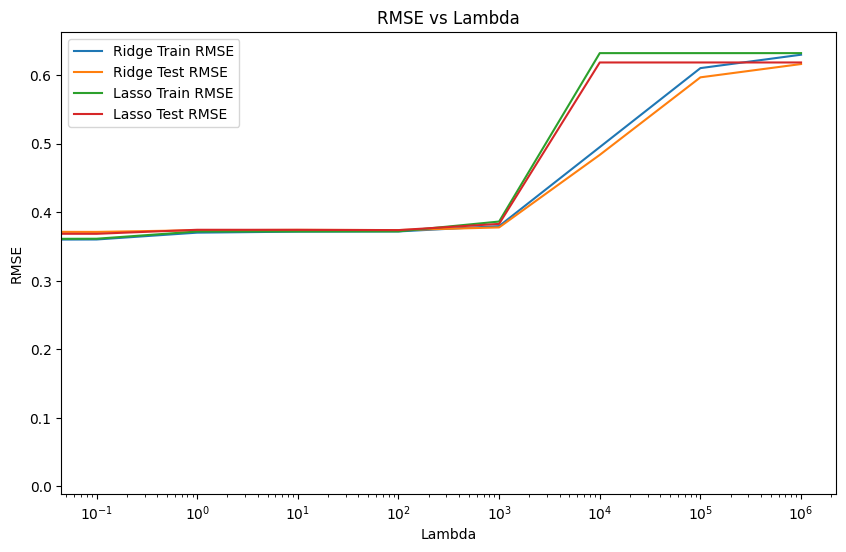

In [6]:
#3.2.2 Plot RMSE vs Lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_errors_train, label='Ridge Train RMSE')
plt.plot(lambdas, ridge_errors_test, label='Ridge Test RMSE')
plt.plot(lambdas, lasso_errors_train, label='Lasso Train RMSE')
plt.plot(lambdas, lasso_errors_test, label='Lasso Test RMSE')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs Lambda')
plt.show()

### 3.(2)(iii) Number of Nonzero Coefficients vs λ

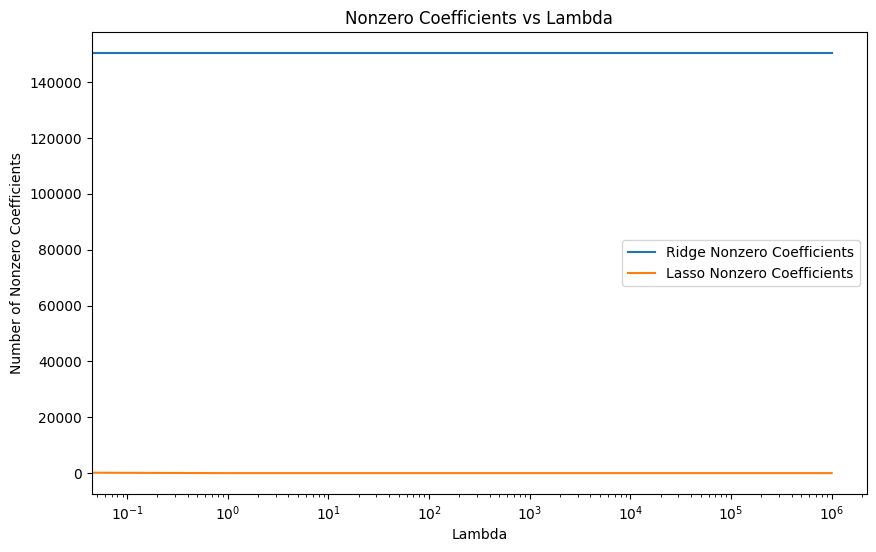

In [7]:
# 3.2.3 Number of Nonzero Coefficients vs λ
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_nonzeros, label='Ridge Nonzero Coefficients')
plt.plot(lambdas, lasso_nonzeros, label='Lasso Nonzero Coefficients')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Number of Nonzero Coefficients')
plt.legend()
plt.title('Nonzero Coefficients vs Lambda')
plt.show()

### 3.(2)(iv) $||w||^2_2$ vs λ

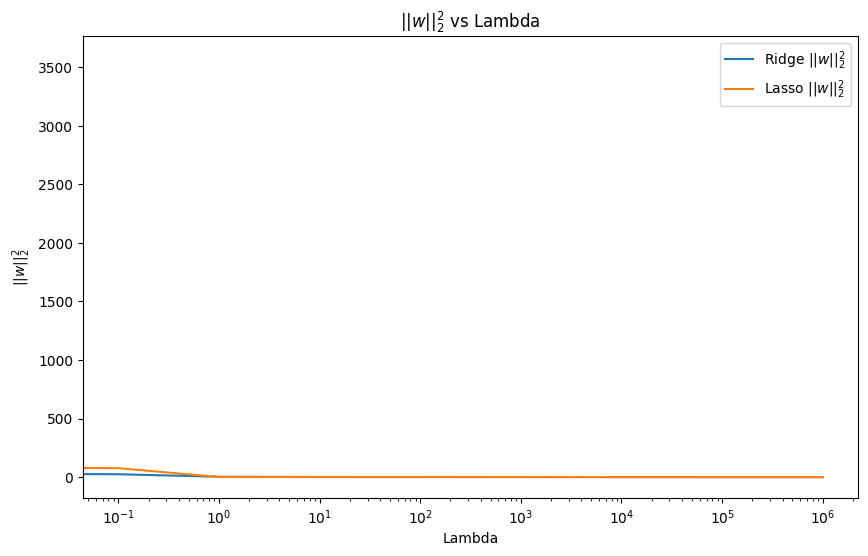

In [8]:
# 3.2.4 ||w||_2 vs λ
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_norms, label='Ridge $||w||^2_2$')
plt.plot(lambdas, lasso_norms, label='Lasso $||w||^2_2$')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('$||w||^2_2$')
plt.legend()
plt.title('$||w||^2_2$ vs Lambda')
plt.show()

## 3.3 Cross-Validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

ridge_scores = []
lasso_scores = []
for lmbda in lambdas:
    print("Lambda", lmbda)
    # Ridge Cross-Validation
    if lmbda == 0:
        ridge = LinearRegression()  # Use LinearRegression for alpha=0
    else:
        ridge = Ridge(alpha=lmbda)
    
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append(np.mean(np.sqrt(-ridge_cv_scores)))
    print("ridge Done")
    
    # Lasso Cross-Validation
    if lmbda == 0:
        lasso = LinearRegression()  # Use LinearRegression for alpha=0
    else:
        lasso = Lasso(alpha=lmbda / len(y_train))  # Increase max_iter for Lasso
    
    lasso_cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_scores.append(np.mean(np.sqrt(-lasso_cv_scores)))
    print("lasso Done")
    print("Lambda", lmbda, "Done!")

print(f'Best Ridge λ: {lambdas[np.argmin(ridge_scores)]}, Cross-Validation RMSE: {min(ridge_scores)}')
print(f'Best Lasso λ: {lambdas[np.argmin(lasso_scores)]}, Cross-Validation RMSE: {min(lasso_scores)}')

Lambda 0
ridge Done
lasso Done
Lambda 0 Done!
Lambda 0.1
ridge Done
lasso Done
Lambda 0.1 Done!
Lambda 1
ridge Done
lasso Done
Lambda 1 Done!
Lambda 10
ridge Done
lasso Done
Lambda 10 Done!
Lambda 100
ridge Done
lasso Done
Lambda 100 Done!
Lambda 1000.0
ridge Done
lasso Done
Lambda 1000.0 Done!
Lambda 10000.0
ridge Done
lasso Done
Lambda 10000.0 Done!
Lambda 100000.0
ridge Done
lasso Done
Lambda 100000.0 Done!
Lambda 1000000.0
ridge Done
lasso Done
Lambda 1000000.0 Done!
Best Ridge λ: 0.1, Cross-Validation RMSE: 0.36861767361196696
Best Lasso λ: 0.1, Cross-Validation RMSE: 0.3669717902463598


In [11]:
# Train final models with best lambda
best_lambda_ridge = lambdas[np.argmin(ridge_scores)]
best_lambda_lasso = lambdas[np.argmin(lasso_scores)]

ridge_final = Ridge(alpha=best_lambda_ridge)
ridge_final.fit(X_train, y_train)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_final.predict(X_test)))

lasso_final = Lasso(alpha=best_lambda_lasso / len(y_train))
lasso_final.fit(X_train, y_train)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_final.predict(X_test)))

print(f'Final test RMSE for Ridge: {ridge_test_rmse}')
print(f'Final test RMSE for Lasso: {lasso_test_rmse}')

Final test RMSE for Ridge: 0.37143516965747786
Final test RMSE for Lasso: 0.36866048420636605
